## Model comparisson
This notebook will compare three different ml models on the same dataset.

### Code and data setup

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import NeuralNet as new_nn
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [35]:
df = pd.read_csv("data/wine_prepared.csv")

In [60]:
X = df.drop(columns=["quality"])
y = df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Multi-linear regression

In [37]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [38]:
print("Model score: ", mlr_model.score(X_test, y_test))
y_pred = mlr_model.predict(X_test)

print("Mean squared error (MSE): ", mean_squared_error(y_test, y_pred))
print("Mean absolute error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean absolute percentage error (MAPE): ", mean_absolute_percentage_error(y_test, y_pred))

Model score:  0.2984279643597243
Mean squared error (MSE):  0.40688275035082366
Mean absolute error (MAE):  0.5154164116492492
Mean absolute percentage error (MAPE):  0.09110192849204782


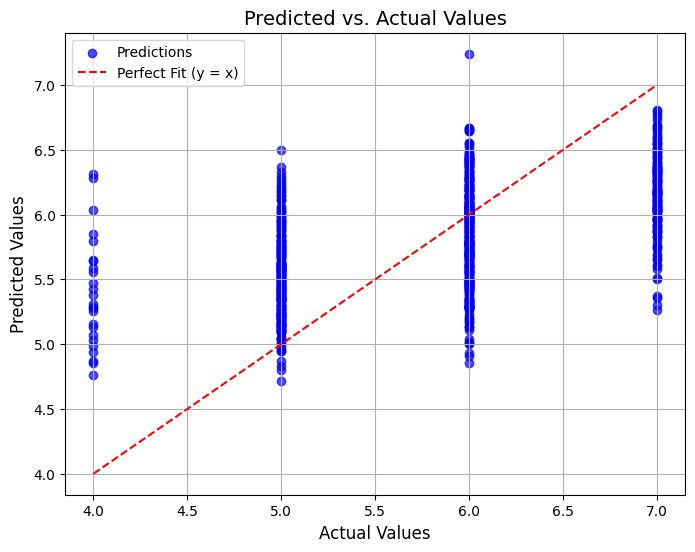

In [39]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predictions')

# Add reference line (y = x)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Fit (y = x)')

# Add labels and title
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Predicted vs. Actual Values", fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig("scatter_mlr.png")

# Show the plot
plt.show()

### Implemented neural network

In [61]:
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

In [62]:
layers = [13, 32, 8, 1]
model = new_nn.NeuralNet(layers, 100, 0.001, 0.0, "relu", 0.1, debug=False)

In [63]:
model.fit(X_train_np, y_train_np)

Neural network starts training
Neural network ends training


In [64]:
y_pred = model.predict(X_test_np)

print("Mean squared error (MSE): ", mean_squared_error(y_test_np, y_pred))
print("Mean absolute error (MAE): ", mean_absolute_error(y_test_np, y_pred))
print("Mean absolute percentage error (MAPE): ", mean_absolute_percentage_error(y_test_np, y_pred))

Mean squared error (MSE):  0.38784482637496087
Mean absolute error (MAE):  0.49926753071434277
Mean absolute percentage error (MAPE):  0.0879046980850058


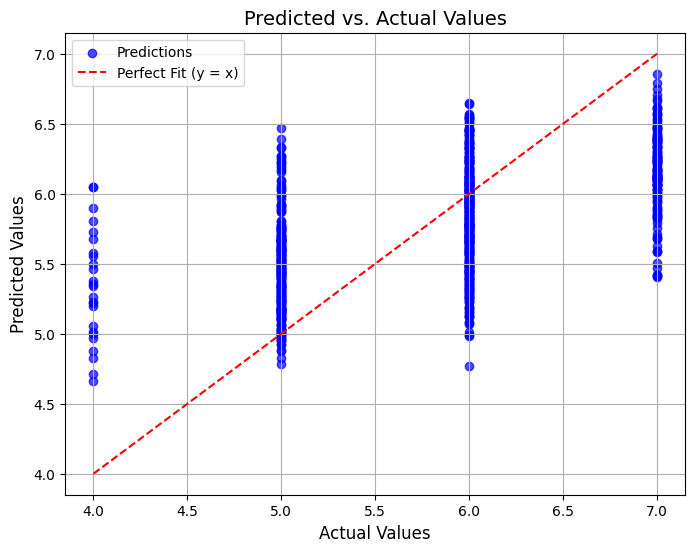

In [65]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred, color='blue', alpha=0.7, label='Predictions')

# Add reference line (y = x)
plt.plot([y_test_np.min(), y_test_np.max()],
         [y_test_np.min(), y_test_np.max()],
         color='red', linestyle='--', label='Perfect Fit (y = x)')

# Add labels and title
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Predicted vs. Actual Values", fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig("scatter_our_nn.png")

# Show the plot
plt.show()

### PyTorch neural network

In [66]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [67]:
batch_size = 16
train_data = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
test_data = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size)

In [68]:
class WineQualityPredictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(X.shape[1], 32)
        self.act1 = nn.ReLU()
        self.hidden6 = nn.Linear(32, 8)
        self.act6 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.act_output = nn.Linear(1, 1)
 
    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act6(self.hidden6(x))
        x = self.act_output(self.output(x))
        return x

In [69]:
model = WineQualityPredictor()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [70]:
n_epochs = 100

for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in train_data:
        # Forward pass
        outputs = model(X_batch)
        loss = loss_fn(outputs, y_batch)
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [71]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).squeeze()

print("Mean squared error (MSE): ", mean_squared_error(y_test, y_pred))
print("Mean absolute error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean absolute percentage error (MAPE): ", mean_absolute_percentage_error(y_test, y_pred))


Mean squared error (MSE):  0.39916842798644353
Mean absolute error (MAE):  0.5084938600276354
Mean absolute percentage error (MAPE):  0.08925395114734372


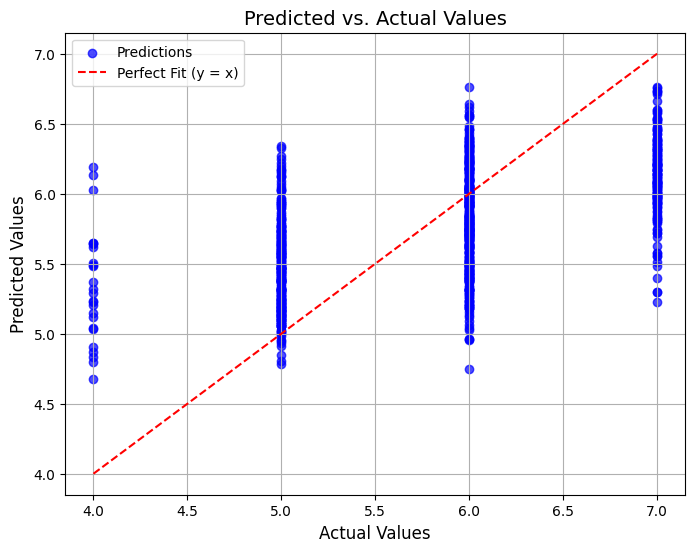

In [72]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predictions')

# Add reference line (y = x)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Fit (y = x)')

# Add labels and title
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Predicted vs. Actual Values", fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig("scatter_pytorch_nn.png")

# Show the plot
plt.show()